# Chapter 5 
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Classical Design and Analysis of Experiments

In [2]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import seaborn as sns
import mistat
import matplotlib.pyplot as plt

## Basic Steps and Guiding Principles

## Blocking and Randomization

## Additive and Non-Additive Linear Models

## The Analysis of Randomized Complete Block Designs

### Several Blocks, Two Treatments per Block:  Paired Comparison

#### The $t$-Test

#### Randomization Tests

In [3]:
random.seed(1)
X = [1.1, 0.3, -0.7, -0.1]
m = 20000

Di = pd.DataFrame([random.choices((-1, 1), k=len(X)) for _ in range(m)])
DiX = (Di * X)

np.mean(DiX.mean(axis=1) > np.mean(X))

0.31425

In [4]:
X = [0.8, 0.6, 0.3, -0.1, 1.1, -0.2, 0.3, 0.5, 0.5, 0.3]
statistic, pvalue = stats.ttest_1samp(X, 0.0)
print(f't {statistic:.2f}')
print(f'pvalue {pvalue:.4f}')

t 3.35
pvalue 0.0085


In [5]:
random.seed(1)
X = [0.8, 0.6, 0.3, -0.1, 1.1, -0.2, 0.3, 0.5, 0.5, 0.3]
m = 200

Di = pd.DataFrame([random.choices((-1, 1), k=len(X)) for _ in range(m)])
DiX = (Di * X)

means = DiX.mean(axis=1)
mistat.stemLeafDiagram(means, 2, leafUnit=0.01)

       1     -4   3
       2     -3   7
       7     -3   55333
      16     -3   097766555
      25     -2   444433111
      38     -2   0999998776666
      62     -1   555444433333333333222211
      82      0   99999999888887776655
    (34)      0   5444333332222111110000112333333444
      84      0   5666666666777779999999999
      59      1   011133333333555
      44      1   555555666666799999
      26      2   01112222333
      15      2   5677888
       8      3   0002
       4      3   99
       2      4   1
       1      4   5


In [6]:
random.seed(1)
X = [0.8, 0.6, 0.3, -0.1, 1.1, -0.2, 0.3, 0.5, 0.5, 0.3]
m = 200

Di = pd.DataFrame([random.choices((-1, 1), k=len(X)) for _ in range(m)])
DiX = (Di * X)

means = DiX.mean(axis=1)
Pestimate = np.mean(DiX.mean(axis=1) > np.mean(X))
print(f'P_estimate: {Pestimate}')

P_estimate: 0.01


### Several Blocks, $t$ Treatments per Block

In [7]:
hadpas = mistat.load_data('HADPAS')

model = smf.ols('res3 ~ C(diska) + C(hyb)', data=hadpas).fit()
print(anova.anova_lm(model))

             df        sum_sq        mean_sq           F        PR(>F)
C(diska)   31.0  2.804823e+06   90478.160618   26.863283  1.169678e-47
C(hyb)      5.0  1.780741e+06  356148.170833  105.741638  4.017015e-48
Residual  155.0  5.220551e+05    3368.097715         NaN           NaN


In [8]:
model.conf_int().tail(5)

,0,1
C(hyb)[T.2],-269.254303,-211.933197
C(hyb)[T.3],-321.723053,-264.401947
C(hyb)[T.4],-271.660553,-214.339447
C(hyb)[T.5],-191.504303,-134.183197
C(hyb)[T.6],-158.160553,-100.839447


In [9]:
ci = model.conf_int().tail(5)
hyb_mean = hadpas.groupby(by='hyb').mean()['res3'] - hadpas['res3'].mean()
print(hyb_mean.round(2))
(ci.iloc[:,1] - ci.iloc[:,0]) / 2

hyb
1    178.17
2    -62.43
3   -114.90
4    -64.83
5     15.32
6     48.67
Name: res3, dtype: float64


C(hyb)[T.2]    28.660553
C(hyb)[T.3]    28.660553
C(hyb)[T.4]    28.660553
C(hyb)[T.5]    28.660553
C(hyb)[T.6]    28.660553
dtype: float64

## Balanced Incomplete Block Designs

## Latin Square Design

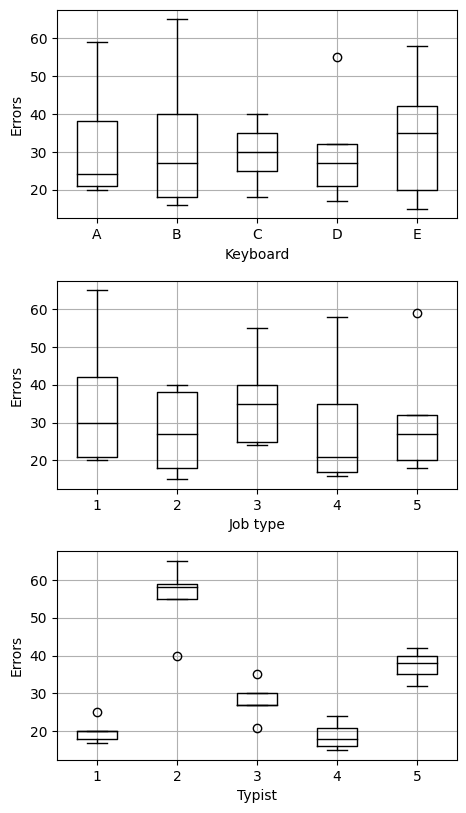

In [10]:
fig, axes = plt.subplots(nrows=3, figsize=(5, 10))
keyboards = mistat.load_data('KEYBOARDS.csv')
effects = [('keyboard', 'Keyboard'), ('job', 'Job type'), ('typist', 'Typist')]

for ax, (effect, label) in zip(axes, effects):
  keyboards.boxplot(column='errors', by=effect, color='black', ax=ax)
  ax.set_title('')
  ax.get_figure().suptitle('')
  ax.set_xlabel(label)
  ax.set_ylabel('Errors')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [11]:
keyboards = mistat.load_data('KEYBOARDS.csv')
model = smf.ols('errors ~ C(keyboard) + C(job) + C(typist)', data=keyboards).fit()
print(anova.anova_lm(model))

               df   sum_sq      mean_sq          F        PR(>F)
C(keyboard)   4.0    69.44    17.360000   0.774078  5.627148e-01
C(job)        4.0   270.64    67.660000   3.016944  6.158117e-02
C(typist)     4.0  4554.64  1138.660000  50.772592  2.009919e-07
Residual     12.0   269.12    22.426667        NaN           NaN


## Full Factorial Experiments

### The Structure of Factorial Experiments

### The ANOVA for Full Factorial Designs

In [12]:
from doepy.build import full_fact
np.random.seed(2)

# Build design from factors
FacDesign = full_fact({
    'k': [1500, 3000, 4500],
    's': [0.005, 0.0125, 0.02],
})

# Randomize design
FacDesign = FacDesign.sample(frac=1).reset_index(drop=True)

# Setup and run simulator with five replicates 
# for each combination of factors
simulator = mistat.PistonSimulator(n_replicate=5, **FacDesign,
                                   m=30, v0=0.005, p0=95_000, t=293, t0=350)
result = simulator.simulate()

model = smf.ols('seconds ~ C(k) * C(s)', data=result).fit()
print(anova.anova_lm(model).round(4))

             df  sum_sq  mean_sq        F  PR(>F)
C(k)        2.0  0.0037   0.0019   2.0451  0.1441
C(s)        2.0  0.0997   0.0499  54.5429  0.0000
C(k):C(s)   4.0  0.0057   0.0014   1.5600  0.2060
Residual   36.0  0.0329   0.0009      NaN     NaN


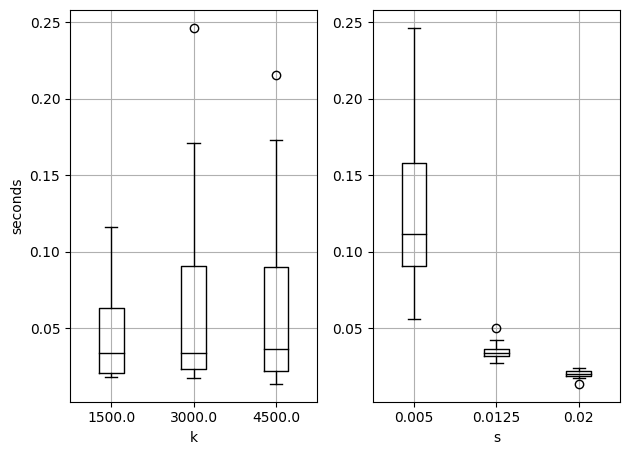

In [13]:
from matplotlib.ticker import FormatStrFormatter


fig, axes = plt.subplots(ncols=2)
result.boxplot('seconds', by='k', color='black', ax=axes[0])
result.boxplot('seconds', by='s', color='black', ax=axes[1])
for ax in axes:
    ax.set_title('')
    ax.get_figure().suptitle('')
axes[0].set_ylabel('seconds')

# without using the formatter, the tick labels for s are 
# printed without rounding - try it
svalues = [0.005, 0.0125, 0.020]
axes[1].xaxis.set_major_formatter(lambda x, _: svalues[x-1])
plt.tight_layout()
plt.show()

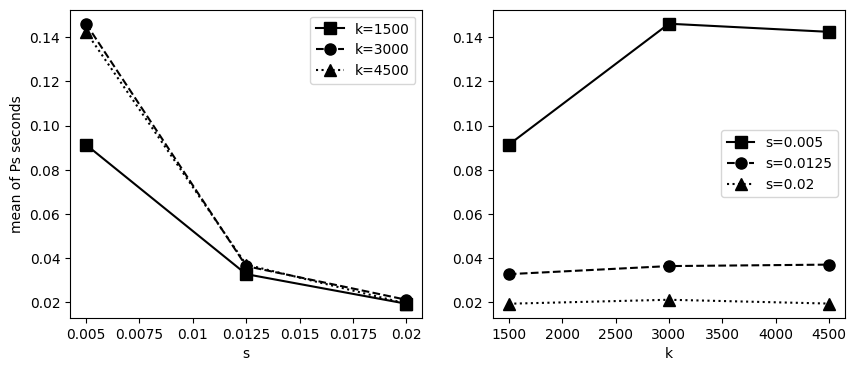

In [14]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(figsize=(10,4), ncols=2)

linestyle = ['-', '--', ':']
marker = ['s', 'o', '^']
grouped = result.groupby(by=['s', 'k'], as_index=False).mean()
for i, (k, g) in enumerate(grouped.groupby('k')):
    g.plot(x='s', y='seconds', ax=axes[0], label=f'k={k:.0f}',
           color='black', marker=marker[i], markersize=8, linestyle=linestyle[i])
axes[0].set_ylabel('mean of Ps seconds')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.4g'))

grouped = result.groupby(by=['k', 's'], as_index=False).mean()
for i, (s, g) in enumerate(grouped.groupby('s')):
    g.plot(x='k', y='seconds', ax=axes[1], label=f's={s:.4g}',
           color='black', marker=marker[i], markersize=8, linestyle=linestyle[i])
ax.set_ylabel('mean of Ps seconds')
plt.show()

In [15]:
anova_result = anova.anova_lm(model)
not_signif = ['C(k)', 'C(k):C(s)', 'Residual']
SS = anova_result['sum_sq'].loc[not_signif].sum()
DF = anova_result['df'].loc[not_signif].sum()
sigma2 = SS / DF
print(SS, DF, sigma2)

0.04234591359792689 42.0 0.0010082360380458783


In [16]:
Ymean = result.groupby('s').mean()['seconds']
print('Ymean', Ymean)
print('Grand', Ymean.sum() / 3)
print('Main effects', Ymean - Ymean.sum() / 3)

Ymean s
0.0050    0.126664
0.0125    0.035420
0.0200    0.019997
Name: seconds, dtype: float64
Grand 0.060693741055435325
Main effects s
0.0050    0.065970
0.0125   -0.025274
0.0200   -0.040696
Name: seconds, dtype: float64


In [17]:
Grand = Ymean.sum() / 3
MainEffects = Ymean - Grand

In [18]:
Salpha = np.sqrt(2 * stats.f.ppf(0.95, 2, 42))

In [19]:
tau = Ymean - Ymean.sum() / 3
df = pd.DataFrame({
  'lower limit': tau - sigma2*Salpha,
  'upper limit': tau + sigma2*Salpha,
})
df

,lower limit,upper limit
s,,
0.0050,0.063411,0.068529
0.0125,-0.027832,-0.022715
0.0200,-0.043255,-0.038138


### Estimating Main Effects and Interactions

### $2^m$ Factorial Designs

In [20]:
from doepy.build import frac_fact_res
d1 = {
    'A': [-1, 1],
    'B': [-1, 1],
    'C': [-1, 1],
    'D': [-1, 1],
    'E': [-1, 1],
}
mistat.addTreatments(frac_fact_res(d1, 4), mainEffects=['A', 'B', 'C', 'D', 'E'])

,Treatments,A,B,C,D,E
0,(1),-1.0,-1.0,-1.0,-1.0,-1.0
1,AE,1.0,-1.0,-1.0,-1.0,1.0
2,BE,-1.0,1.0,-1.0,-1.0,1.0
3,AB,1.0,1.0,-1.0,-1.0,-1.0
4,CE,-1.0,-1.0,1.0,-1.0,1.0
5,AC,1.0,-1.0,1.0,-1.0,-1.0
6,BC,-1.0,1.0,1.0,-1.0,-1.0
7,ABCE,1.0,1.0,1.0,-1.0,1.0
8,D,-1.0,-1.0,-1.0,1.0,-1.0
9,ADE,1.0,-1.0,-1.0,1.0,1.0


In [21]:
from doepy.build import full_fact
d1 = {
    'A': [1, 2],
    'B': [1, 2],
    'C': [1, 2],
    'D': [1, 2],
    'E': [1, 2],
}
Design = full_fact(d1)
Design = mistat.addTreatments(Design, mainEffects=['A', 'B', 'C', 'D', 'E'])
print(Design.head(3).round(0))
print(Design.tail(3).round(0))

  Treatments    A    B    C    D    E
0        (1)  1.0  1.0  1.0  1.0  1.0
1          A  2.0  1.0  1.0  1.0  1.0
2          B  1.0  2.0  1.0  1.0  1.0
   Treatments    A    B    C    D    E
29       ACDE  2.0  1.0  2.0  2.0  2.0
30       BCDE  1.0  2.0  2.0  2.0  2.0
31      ABCDE  2.0  2.0  2.0  2.0  2.0


In [22]:
np.random.seed(3)
factors = {
  'm': [30, 60],
  's': [0.005, 0.02],
  'v0': [0.002, 0.01],
  'k': [1000, 5000],
  't': [290, 296],
}
Design = full_fact(factors)

# Randomize design
Design = Design.sample(frac=1).reset_index(drop=True)

# Run the simulation with 5 replications for each setting
simulator = mistat.PistonSimulator(**{k:list(Design[k]) for k in Design},
                                   p0=90_000, t0=340, n_replicate=5)
result = simulator.simulate()

In [23]:
table = result.groupby(list(factors.keys()), as_index=False)
table = table.agg({'seconds':['mean','std']})
table.columns = [' '.join(c).strip() for c in table.columns.to_flat_index()]

In [24]:
table

,m,s,v0,k,t,seconds mean,seconds std
0,30.0,0.005,0.002,1000.0,290.0,0.027444,0.015691
1,30.0,0.005,0.002,1000.0,296.0,0.035143,0.019220
2,30.0,0.005,0.002,5000.0,290.0,0.045168,0.017246
3,30.0,0.005,0.002,5000.0,296.0,0.040495,0.023375
4,30.0,0.005,0.010,1000.0,290.0,0.164130,0.046598
5,30.0,0.005,0.010,1000.0,296.0,0.188258,0.013468
6,30.0,0.005,0.010,5000.0,290.0,0.199698,0.033640
7,30.0,0.005,0.010,5000.0,296.0,0.207137,0.035778
8,30.0,0.020,0.002,1000.0,290.0,0.008035,0.001513
9,30.0,0.020,0.002,1000.0,296.0,0.008535,0.001133


In [25]:
# Pooled standard deviation 13.7.41
byFactors = result.groupby(list(factors.keys()))
groupedStd = byFactors.std()['seconds']
pooledVar = np.mean(groupedStd**2)
Vparam = pooledVar  / (5 * len(byFactors))
SE = np.sqrt(Vparam)

In [26]:
# Perform analysis of variance
Design['response'] = result['seconds']
model = smf.ols('seconds ~ (m + s + v0 + k + t) ** 2', data=result).fit()
# print(anova.anova_lm(model))
print(f'r2={model.rsquared}')

r2=0.9064681604864157


In [27]:
import re
results = {
  'LSE': model.params,
  'S.E.': SE,
  't': model.params / SE,
}
pattern = r'\[.*?\]'
names = [re.sub(pattern, '', s) for s in model.params.index]
df = pd.DataFrame(results)
df.index = names
significance = ['**' if abs(t) > 7 else '*' if abs(t) > 2.6 else ''
                for t in df['t']]
df['significance'] = significance

In [28]:
df.round(5)

,LSE,S.E.,t,significance
Intercept,0.01246,0.00222,5.61579,*
m,-0.00542,0.00222,-2.44314,
s,37.92774,0.00222,17097.51940,**
v0,-61.95115,0.00222,-27927.07806,**
k,-0.00000,0.00222,-0.00136,
t,-0.00015,0.00222,-0.06573,
m:s,-0.04131,0.00222,-18.62440,**
m:v0,0.13317,0.00222,60.03024,**
m:k,0.00000,0.00222,0.00003,
m:t,0.00002,0.00222,0.00832,


In [29]:
print(np.var(model.predict(result)))

0.006895931584091573


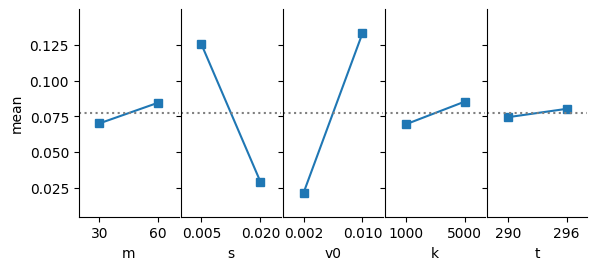

In [30]:
mistat.mainEffectsPlot(result[['m', 's', 'v0', 'k', 't', 'seconds']], 'seconds')
plt.show()

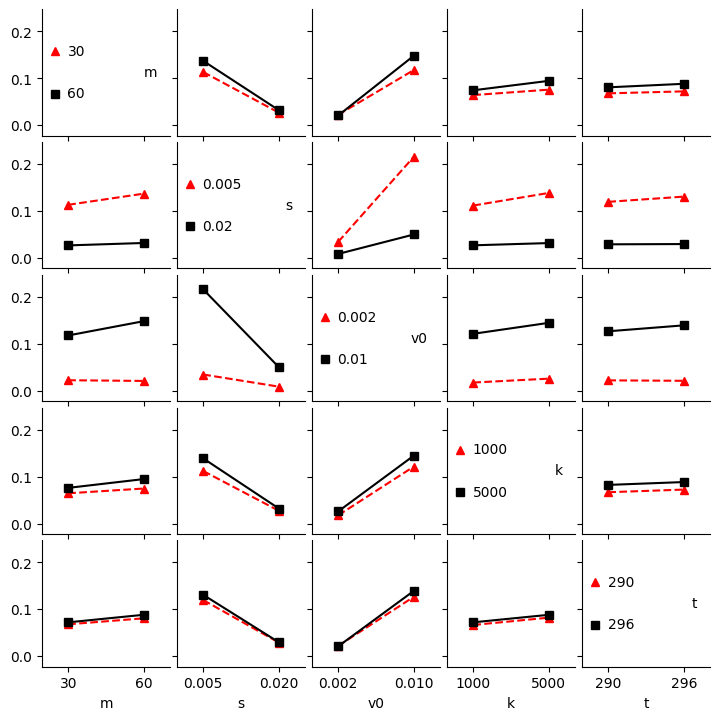

In [31]:
mistat.interactionPlot(result[['m', 's', 'v0', 'k', 't', 'seconds']], 'seconds')
plt.show()

### $3^m$ Factorial Designs

In [32]:
# ignore RuntimeWarning
import warnings
warnings.simplefilter('ignore', category=RuntimeWarning)

In [33]:
from itertools import product
stress = mistat.load_data('STRESS')

# formula = 'A + B + C '
# formula += '+ I(A**2) + I(B**2) + I(C**2) '
# formula += '+ A*B + A*C + B*C + A*B*C'

formula = '(A+B+C+I(A**2)+I(B**2)+I(C**2))**3'
model = smf.ols(f"stress ~ {formula}", data=stress).fit()
print(model.summary2())

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       nan       
Dependent Variable:     stress             AIC:                  -1284.2435
Date:                   2022-09-10 19:46   BIC:                  -1249.2559
No. Observations:       27                 Log-Likelihood:       669.12    
Df Model:               26                 F-statistic:          nan       
Df Residuals:           0                  Prob (F-statistic):   nan       
R-squared:              1.000              Scale:                inf       
---------------------------------------------------------------------------
                               Coef.   Std.Err.    t    P>|t| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                     191.8000      inf  0.0000   nan    nan    nan
A                              27.5857      inf  0.0000   nan    nan    nan
B                             -27.

In [34]:
# restore warnings
warnings.simplefilter('default', category=RuntimeWarning)

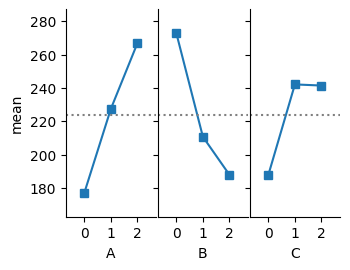

In [35]:
stress = mistat.load_data('STRESS')
mistat.mainEffectsPlot(stress, 'stress')
plt.show()

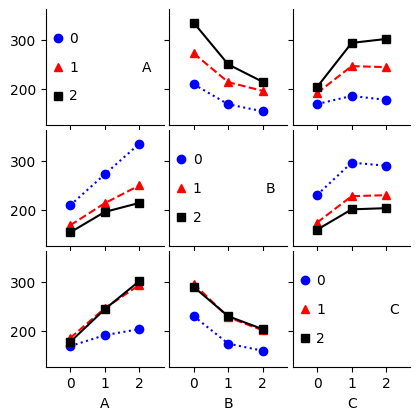

In [36]:
mistat.interactionPlot(stress, 'stress')
plt.show()

## Blocking and Fractional Replications of $2^m$ Factorial Designs

In [37]:
def renderDesign(design, mainEffects):
    design = mistat.addTreatments(design, mainEffects)
    defining = set(design.columns) - set(mainEffects) - {'Treatments'}
    columns = [('Treatments', '')]
    columns.extend(('Main Effects', effect) for effect in mainEffects)
    columns.extend(('Defining Parameter', effect) for effect in design.columns if effect in defining)
    design.columns = pd.MultiIndex.from_tuples(columns, names=["first", "second"])
    style = design.style.hide(axis='index')
    style = style.format(precision=0)
    return style.to_latex(hrules=True, column_format='c'+'r'*(len(columns)-1))

In [38]:
from pyDOE2 import fracfact
design = pd.DataFrame(fracfact('A B C ABC'), columns='A B C ABC'.split())
print(renderDesign(design, 'A B C'.split()))

\begin{tabular}{crrrr}
\toprule
Treatments & \multicolumn{3}{r}{Main Effects} & Defining Parameter \\
 & A & B & C & ABC \\
\midrule
(1) & -1 & -1 & -1 & -1 \\
A & 1 & -1 & -1 & 1 \\
B & -1 & 1 & -1 & 1 \\
AB & 1 & 1 & -1 & -1 \\
C & -1 & -1 & 1 & 1 \\
AC & 1 & -1 & 1 & -1 \\
BC & -1 & 1 & 1 & -1 \\
ABC & 1 & 1 & 1 & 1 \\
\bottomrule
\end{tabular}



In [39]:
from pyDOE2 import fracfact
# define the generator
generator = 'A B C ABC'
design = pd.DataFrame(fracfact(generator), columns=generator.split())
block_n = design[design['ABC'] == -1]
block_p = design[design['ABC'] == 1]

In [40]:
mistat.subgroupOfDefining(['ABCH', 'ABEFG', 'BDEFH'])

['', 'ABCH', 'ABEFG', 'ACDEF', 'ADGH', 'BCDG', 'BDEFH', 'CEFGH']

In [41]:
mainEffects = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
defining = ['ABCH', 'ABEFG', 'BDEFH', 'BCEFH']
design = pd.DataFrame(fracfact(' '.join(mainEffects)), columns=mainEffects)
design = mistat.addTreatments(design, mainEffects)
subgroup = mistat.subgroupOfDefining(defining, noTreatment='(1)')
block1 = design[design['Treatments'].isin(subgroup)]
block1

,Treatments,A,B,C,D,E,F,G,H
0,(1),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12,CD,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
49,AEF,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
61,ACDEF,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
66,BG,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
78,BCDG,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
115,ABEFG,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
127,ABCDEFG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
135,ABCH,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
139,ABDH,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0


## Exploration of Response Surfaces

### Second Order Designs

### Some Specific Second Order Designs

#### $3^k$-Designs

#### Central Composite Designs

In [42]:
from doepy.build import central_composite
factors = {
  's': [0.01, 0.015],
  'v0': [0.00625, 0.00875],
  'k': [2000, 4000],
  't0': [345, 355],
}
Design = central_composite(factors, alpha='r', center=[4, 4])

In [43]:
simulator = mistat.PistonSimulator(**Design, m=60, p0=110_000, t=296, 
                                   n_replicate=50, seed=2)
result = simulator.simulate()

# calculate mean and std of response by group
result = result.groupby(by='group')
result = result.agg({'s': 'mean', 'v0': 'mean', 'k': 'mean',
                     't0': 'mean', 'seconds':['mean','std']})
result.columns = ['s', 'v0', 'k', 't0', 'Ymean', 'Ystd']

In [44]:
# transformation between factors and code levels
factor2x = {factor: f'x{i}' for i, factor in enumerate(factors, 1)}
x2factor = {f'x{i}': factor for i, factor in enumerate(factors, 1)}
center = {factor: 0.5 * (max(values) + min(values))
          for factor, values in factors.items()}
unit = {factor: 0.5 * (max(values) - min(values))
        for factor, values in factors.items()}

# define helper function to convert code co-ordinates to factor co-ordinates
def toFactor(code, codeValue):
    ''' convert code to factor co-ordinates '''
    factor = x2factor[code]
    return center[factor] + codeValue * unit[factor]

# add code levels to table
for c in factors:
    result[factor2x[c]] =  (result[c] - center[c]) / unit[c]

In [45]:
table = result[['x1', 'x2', 'x3', 'x4', 'Ymean', 'Ystd']]
table.round(6)

,x1,x2,x3,x4,Ymean,Ystd
group,,,,,,
1,-1.0,-1.0,-1.0,-1.0,0.056346,0.007821
2,1.0,-1.0,-1.0,-1.0,0.037006,0.004519
3,-1.0,1.0,-1.0,-1.0,0.082830,0.010794
4,1.0,1.0,-1.0,-1.0,0.054473,0.005244
5,-1.0,-1.0,1.0,-1.0,0.066108,0.009887
6,1.0,-1.0,1.0,-1.0,0.040844,0.004320
7,-1.0,1.0,1.0,-1.0,0.102698,0.016162
8,1.0,1.0,1.0,-1.0,0.062328,0.006005
9,-1.0,-1.0,-1.0,1.0,0.052285,0.005888


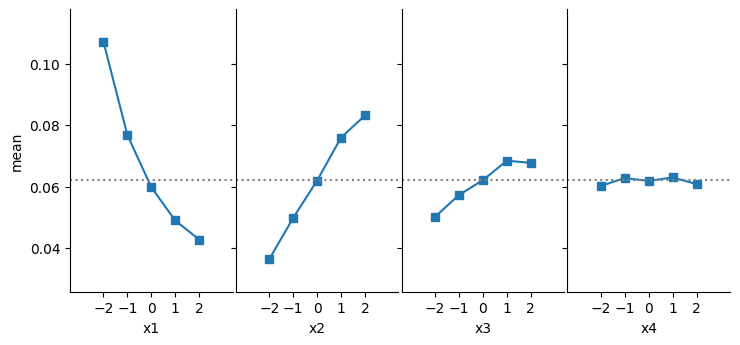

In [46]:
mistat.mainEffectsPlot(result, 'Ymean', factors=['x1', 'x2', 'x3', 'x4'],
                       height=3.75, aspect=0.5)

In [47]:
formula = ('Ymean ~ (x1+x2+x3+x4)**2 + ' +
           'I(x1**2) + I(x2**2) + I(x3**2) + I(x4**2)')
model = smf.ols(formula, data=result).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989     
Dependent Variable: Ymean            AIC:                -301.2069 
Date:               2022-09-10 19:46 BIC:                -279.2208 
No. Observations:   32               Log-Likelihood:     165.60    
Df Model:           14               F-statistic:        208.0     
Df Residuals:       17               Prob (F-statistic): 3.71e-16  
R-squared:          0.994            Scale:              3.5252e-06
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.0599    0.0007   90.2640  0.0000   0.0585   0.0613
x1             -0.0146    0.0004  -38.1172  0.0000  -0.0154  -0.0138
x2              0.0126    0.0004   32.8412  0.0000   0.0118   0.0134
x3              0.0052    0.0004   13.4893  0.0000   0.0044 

In [48]:
formula = ('Ymean ~ x1 + x2 + x3 + x1:x3 + x1:x2 + I(x1**2)')
reduced_model = smf.ols(formula, data=result).fit()
print(reduced_model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989     
Dependent Variable: Ymean            AIC:                -302.4490 
Date:               2022-09-10 19:46 BIC:                -292.1888 
No. Observations:   32               Log-Likelihood:     158.22    
Df Model:           6                F-statistic:        448.4     
Df Residuals:       25               Prob (F-statistic): 3.42e-24  
R-squared:          0.991            Scale:              3.8018e-06
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.0596    0.0004  136.6637  0.0000   0.0587   0.0605
x1             -0.0146    0.0004  -36.7047  0.0000  -0.0154  -0.0138
x2              0.0126    0.0004   31.6243  0.0000   0.0118   0.0134
x3              0.0052    0.0004   12.9895  0.0000   0.0044 

In [49]:
def plotResponseSurface(model, center, unit, x1=None, x2=None,
                        x3=0, x4=0, ncontours=20):
    # predict in code co-ordinates
    x1 = x1 or (-2, 4)
    x2 = x2 or (-2, 2)
    x1 = np.linspace(*x1)
    x2 = np.linspace(*x2)
    X1, X2 = np.meshgrid(x1, x2)
    exog = pd.DataFrame({'x1': X1.ravel(), 'x2': X2.ravel(), 'x3': x3, 'x4': x4})
    responses = model.predict(exog=exog)

    # display in factor co-ordinates
    svalues = toFactor('x1', x1)
    v0values = toFactor('x2', x2)
    CS = plt.contour(svalues, v0values,
                responses.values.reshape(len(x2), len(x1)),
                ncontours, colors='gray')
    ax = plt.gca()
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_xlabel('s')
    ax.set_ylabel('v0')
    return ax

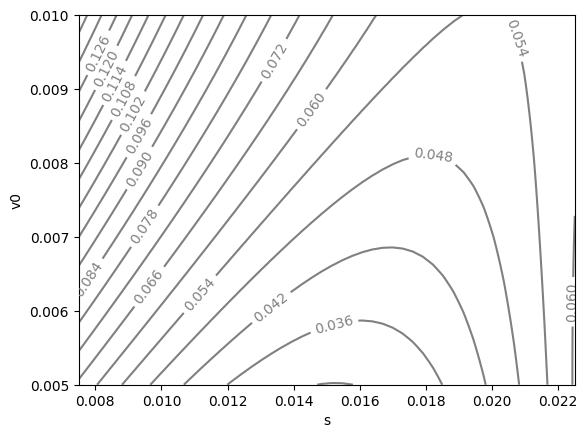

In [50]:
plotResponseSurface(model, center, unit)
plt.show()

### Approaching the Region of the Optimal Yield

In [51]:
# calculate gradient and create steps along gradient to descend
codes = ['x1', 'x2', 'x3', 'x4']
rsm = mistat.ResponseSurfaceMethod(model, codes)
distance = np.arange(0, 2.6, 0.5)
direction = {code: np.zeros(len(distance)) for code in codes}
x = pd.Series(np.zeros(4), index=codes)
for step in range(len(distance)):
    for code in codes:
        direction[code][step] = x[code]
    gradient = rsm.gradient(x)
    x = x - 0.5 * gradient

In [52]:
path = rsm.constrainedOptimization((0, 0, 0, 0), distances=(0.5, 1, 1.5, 2, 2.5), 
                                   maximize=False)
steps = pd.DataFrame({x2factor[code]: toFactor(code, path[code]) 
                      for code in rsm.codes})

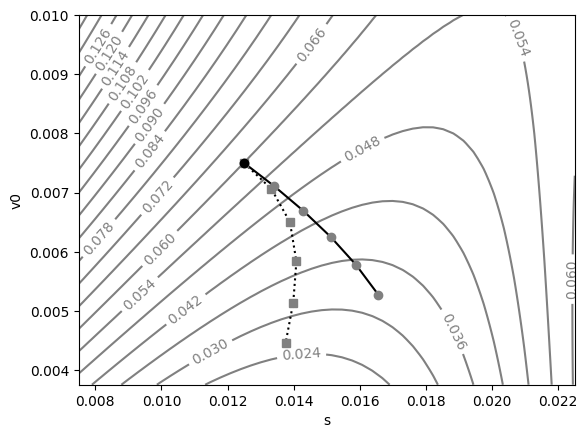

In [53]:
# convert direction from code co-ordinates to factor co-ordinates
factor_direction = {x2factor[code]: toFactor(code, d)
                    for code, d in direction.items()}

# predict along the steps in direction and collect results
result = pd.DataFrame({
    'distance': distance,
    **direction,
    **factor_direction,
    'yhat': model.get_prediction(exog=direction).predicted_mean,
})

ax = plotResponseSurface(model, center, unit, x1=(-2, 4), x2=(-3, 2))
ax.plot(result['s'], result['v0'], '-o',
        color='black', markerfacecolor='gray', markeredgecolor='gray')
ax.plot(steps['s'], steps['v0'], ':s',
        color='black', markerfacecolor='gray', markeredgecolor='gray')
ax.plot(center['s'], center['v0'], 'o', color='black')

plt.show()

In [54]:
table = result[['distance', 'x1', 'x2', 'x3', 'x4', 's', 'v0', 'k', 't0', 'yhat']]

In [55]:
table.round(3)

,distance,x1,x2,x3,x4,s,v0,k,t0,yhat
0,0.0,0.000,0.000,0.000,0.000,0.012,0.008,3000.000,350.000,0.060
1,0.5,0.366,-0.315,-0.129,-0.003,0.013,0.007,2870.523,349.985,0.051
2,1.0,0.717,-0.648,-0.257,-0.006,0.014,0.007,2742.561,349.972,0.044
3,1.5,1.048,-1.001,-0.383,-0.008,0.015,0.006,2616.998,349.961,0.039
4,2.0,1.353,-1.378,-0.505,-0.009,0.016,0.006,2495.215,349.953,0.035
5,2.5,1.623,-1.782,-0.621,-0.010,0.017,0.005,2379.333,349.952,0.033


In [56]:
for column in ['k', 't0']:
  table[column] = table[column].astype(np.int64)

style = table.style.hide(axis='index')
style = style.format(subset=['distance'], precision=1)
style = style.format(subset=['s', 'v0'], precision=4)
style = style.format(subset=['yhat'], precision=3)
style = style.format(subset=['k', 't0'], precision=0)
style = style.format(subset=['x1', 'x2', 'x3', 'x4'], precision=2)
print(style.to_latex(hrules=True, column_format='cccccccccc'))

\begin{tabular}{cccccccccc}
\toprule
distance & x1 & x2 & x3 & x4 & s & v0 & k & t0 & yhat \\
\midrule
0.0 & 0.00 & 0.00 & 0.00 & 0.00 & 0.0125 & 0.0075 & 3000 & 350 & 0.060 \\
0.5 & 0.37 & -0.32 & -0.13 & -0.00 & 0.0134 & 0.0071 & 2870 & 349 & 0.051 \\
1.0 & 0.72 & -0.65 & -0.26 & -0.01 & 0.0143 & 0.0067 & 2742 & 349 & 0.044 \\
1.5 & 1.05 & -1.00 & -0.38 & -0.01 & 0.0151 & 0.0062 & 2616 & 349 & 0.039 \\
2.0 & 1.35 & -1.38 & -0.50 & -0.01 & 0.0159 & 0.0058 & 2495 & 349 & 0.035 \\
2.5 & 1.62 & -1.78 & -0.62 & -0.01 & 0.0166 & 0.0053 & 2379 & 349 & 0.033 \\
\bottomrule
\end{tabular}



### Canonical Representation

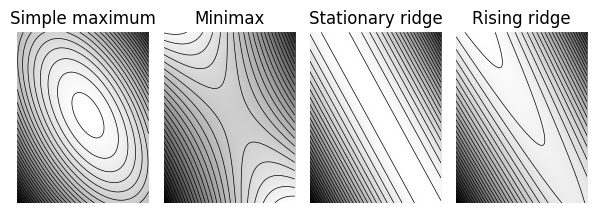

In [57]:
import matplotlib.cm as cm

def surface1(x, y):
  return 83.57 + 9.39*x + 7.12*y - 7.44*x**2 - 3.71*y**2 - 5.80*x*y

def surface2(x, y):
  return 84.29 + 11.06*x + 4.05*y - 6.46*x**2 - 0.43*y**2 - 9.38*x*y

def surface3(x, y):
  return 83.93 + 10.23*x + 5.59*y - 6.95*x**2 - 2.07*y**2 - 7.59*x*y

def surface4(x, y):
  return 82.71 + 8.80*x + 8.19*y - 6.95*x**2 - 2.07*y**2 - 7.59*x*y

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-6.0, 7.0, delta)
X, Y = np.meshgrid(x, y)
Z = surface2(X, Y)

plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, axes = plt.subplots(figsize=(6, 6), ncols=4) #, nrows=2)
# axes = [*axes[0], *axes[1]]

for ax, surface in zip(axes, [surface1, surface2, surface3, surface4]):
    Z = surface(X, Y)
    im = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.gray, extent=(min(x), max(x), min(y), max(y)))
    CS = ax.contour(X, Y, Z, 30, colors='black', linewidths=0.5)
    ax.axis('off')
axes[0].set_title('Simple maximum')
axes[1].set_title('Minimax')
axes[2].set_title('Stationary ridge')
axes[3].set_title('Rising ridge')
plt.tight_layout()
plt.show()

In [58]:
codes = ['x1', 'x2', 'x3', 'x4']
rsm = mistat.ResponseSurfaceMethod(model, codes)
stationary = rsm.stationary_point()

factor_stationary = pd.Series({x2factor[code]: toFactor(code, d)
                     for code, d in stationary.items()})
factor_stationary

s        0.018796
v0       0.009571
k     1451.172868
t0     317.713341
dtype: float64

In [59]:
path = rsm.constrainedOptimization(rsm.stationary_point(), maximize=False, 
                                   reverse=True)
steps = pd.DataFrame({x2factor[code]: toFactor(code, path[code]) 
                      for code in rsm.codes})
steps.head()

,s,v0,k,t0
0,0.018796,0.009571,1451.172868,317.713341
1,0.018337,0.008990,1441.344186,317.749174
2,0.018461,0.008589,2055.556297,317.775331
3,0.018293,0.008099,2357.674709,317.806241
4,0.018126,0.007608,2659.852584,317.837251


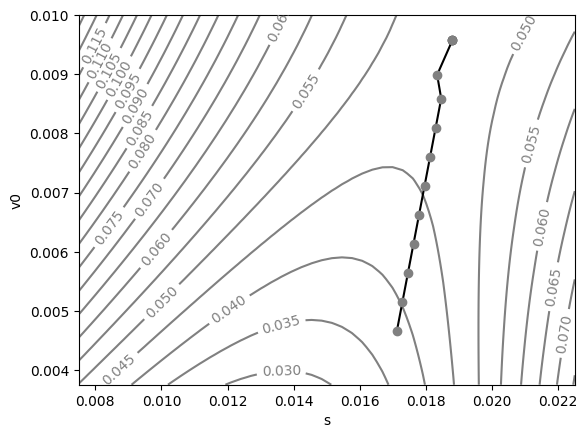

In [60]:
ax = plotResponseSurface(model, center, unit,
                         x1=(-2, 4), x2=(-3, 2),
                         x3=stationary['x3'], x4=stationary['x4'])
ax.plot(factor_stationary['s'], factor_stationary['v0'], 'o', color='black')
ax.plot(steps['s'], steps['v0'], '-o',
        color='black', markerfacecolor='gray', markeredgecolor='gray')
plt.show()

## Evaluating Designed Experiments

In [61]:
design35 = mistat.load_data('CUSTOMDESIGN_35')
design80 = mistat.load_data('CUSTOMDESIGN_80')
design169 = mistat.load_data('CUSTOMDESIGN_169')

In [62]:
design35

,m,s,v0,k,p0,t0,t
0,30,0.020,0.010,1000,0.0009,360,296
1,60,0.020,0.002,1000,0.0011,340,296
2,30,0.020,0.010,5000,0.0011,360,290
3,30,0.020,0.010,5000,0.0009,360,296
4,30,0.005,0.002,1000,0.0009,340,290
5,60,0.005,0.010,5000,0.0009,340,296
6,30,0.005,0.002,1000,0.0009,360,296
7,60,0.020,0.002,1000,0.0011,360,290
8,30,0.020,0.010,1000,0.0009,360,296
9,60,0.005,0.010,5000,0.0009,360,290


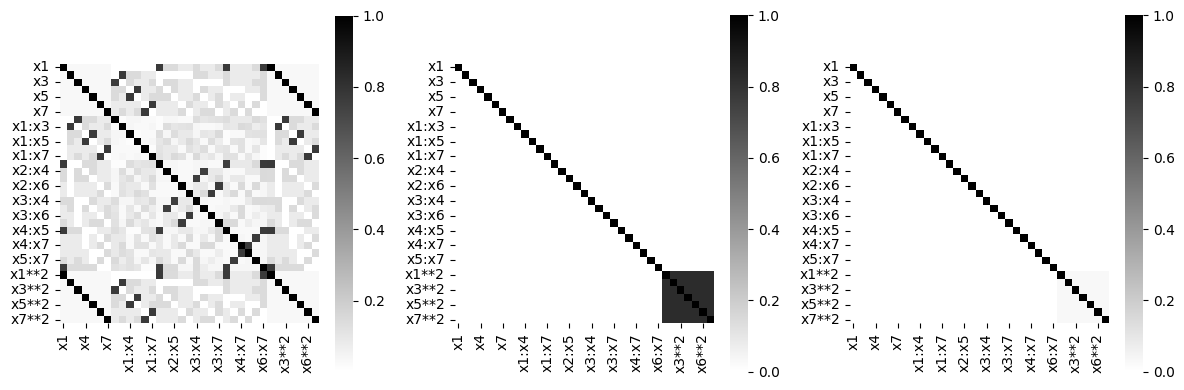

In [63]:
def plotCorrelation(design, mod=0, ax=None):
    mm = mistat.getModelMatrix(design, mod=mod)
    mm = mm.drop(columns='Intercept')
    corr = mm.corr().abs()
    if ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(11, 7)
    sns.heatmap(corr, cmap='binary', ax=ax, square=True)
    return ax

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
plotCorrelation(design35, mod=2, ax=axes[0])
plotCorrelation(design80, mod=2, ax=axes[1])
plotCorrelation(design169, mod=2, ax=axes[2])
plt.tight_layout()
plt.show()

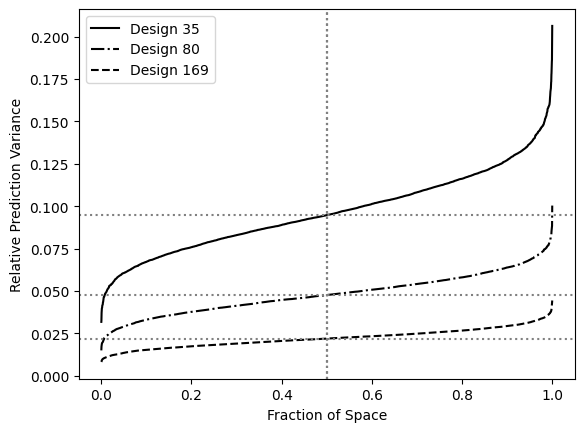

In [64]:
ax = None
ax = mistat.FDS_Plot(design35, ax=ax, label='Design 35',
    plotkw={'linestyle': '-'})
ax = mistat.FDS_Plot(design80, ax=ax, label='Design 80',
    plotkw={'linestyle': '-.'})
ax = mistat.FDS_Plot(design169, maxscale=np.power(2, 7/4),
    ax=ax, label='Design 169', plotkw={'linestyle': '--'})
plt.show()

## Chapter Highlights

## Exercises